# Reading the data

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Comments.csv")
df.head()

,comment,Cleaned_Comment,Sentiment
0,Is this a game or is this real 😝,Is this a game or is this real,negative
1,bellissimo red bull a palermo citty in yuo ntube,bellissimo red bull a palermo citty in yuo ntube,neutral
2,That wedding just got blessed by a screaming V...,That wedding just got blessed by a screaming V10,neutral
3,Tututuru...(type what is missing),Tututurutype what is missing,negative
4,Макс в перед к Победе !!!.❤❤❤❤❤❤❤,NaN,neutral


In [ ]:
df.shape

(1943, 3)

# Removing null values and balancing the dataset

In [ ]:
df.isna().sum()

comment             0
Cleaned_Comment    85
Sentiment          15
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.Sentiment.value_counts()

Sentiment
neutral     1080
positive     685
negative      85
Name: count, dtype: int64

In [ ]:
# handle class imbalance

min_samples = 80

df_positive = df[df.Sentiment=='positive'].sample(min_samples, random_state=2024)
df_negative = df[df.Sentiment=='negative'].sample(min_samples, random_state=2024)
df_neutral = df[df.Sentiment=='neutral'].sample(min_samples, random_state=2024)

In [ ]:
df = pd.concat([df_positive, df_negative, df_neutral])
df.Sentiment.value_counts()

Sentiment
positive    80
negative    80
neutral     80
Name: count, dtype: int64

In [ ]:
df.head()

,comment,Cleaned_Comment,Sentiment
299,that red bull is just beautiful,that red bull is just beautiful,positive
1592,"Beautiful video, wonderful Palermo. Red Bull b...",Beautiful video wonderful Palermo Red Bull buy...,positive
20,Max would drive a F1 car as a daily driver if ...,Max would drive a F1 car as a daily driver if ...,positive
985,Love to watch a video like this by RedBull tea...,Love to watch a video like this by RedBull tea...,positive
1307,"Aw man that was beautiful, might buy a red bul...",Aw man that was beautiful might buy a red bull...,positive


# Visualisation

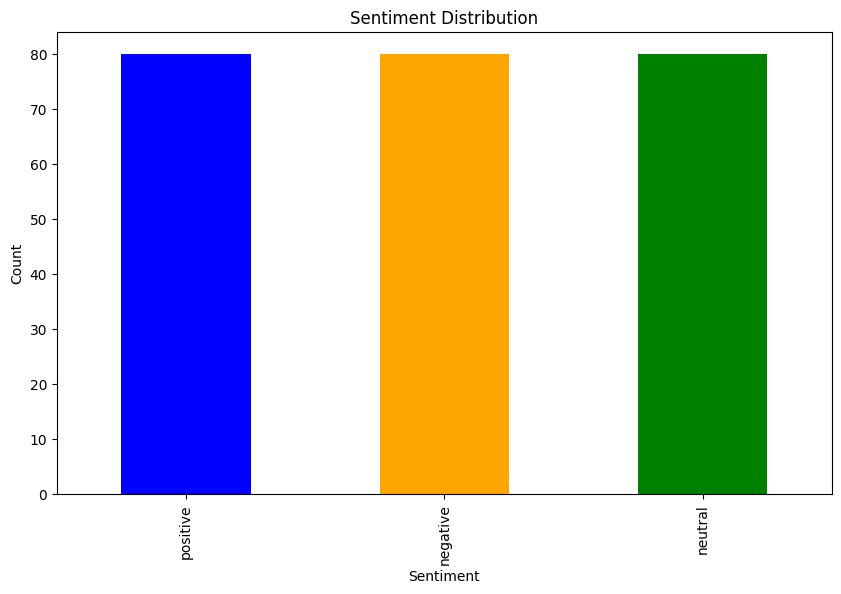

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


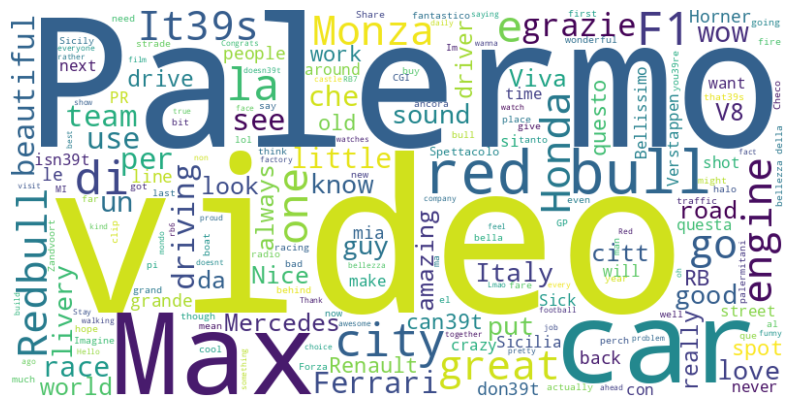

In [ ]:
from wordcloud import WordCloud

# Combine all comments into a single string
comments_text = ' '.join(df['Cleaned_Comment'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [ ]:
def preprocess(text):
    doc = nlp(text)

    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
df['clean_text'] = df['Cleaned_Comment'].apply(preprocess)

In [ ]:
df.head()

,comment,Cleaned_Comment,Sentiment,clean_text
299,that red bull is just beautiful,that red bull is just beautiful,positive,red bull beautiful
1592,"Beautiful video, wonderful Palermo. Red Bull b...",Beautiful video wonderful Palermo Red Bull buy...,positive,beautiful video wonderful Palermo Red Bull buy...
20,Max would drive a F1 car as a daily driver if ...,Max would drive a F1 car as a daily driver if ...,positive,Max drive F1 car daily driver road legal
985,Love to watch a video like this by RedBull tea...,Love to watch a video like this by RedBull tea...,positive,love watch video like RedBull team use fire ca...
1307,"Aw man that was beautiful, might buy a red bul...",Aw man that was beautiful might buy a red bull...,positive,aw man beautiful buy red bull today


# Training the model

In [ ]:
df['vector'] = df['clean_text'].apply(lambda x: nlp(x).vector)

In [ ]:
df.head()

,comment,Cleaned_Comment,Sentiment,clean_text,vector
299,that red bull is just beautiful,that red bull is just beautiful,positive,red bull beautiful,"[-1.9284201, 0.22981, -3.3308997, 1.3902749, 0..."
1592,"Beautiful video, wonderful Palermo. Red Bull b...",Beautiful video wonderful Palermo Red Bull buy...,positive,beautiful video wonderful Palermo Red Bull buy...,"[-1.9251741, 0.9038, -1.248204, -0.5262009, 0...."
20,Max would drive a F1 car as a daily driver if ...,Max would drive a F1 car as a daily driver if ...,positive,Max drive F1 car daily driver road legal,"[-0.21256757, 2.713755, -0.7559749, 0.9736049,..."
985,Love to watch a video like this by RedBull tea...,Love to watch a video like this by RedBull tea...,positive,love watch video like RedBull team use fire ca...,"[-0.0078845145, -0.18451956, -2.668435, -1.678..."
1307,"Aw man that was beautiful, might buy a red bul...",Aw man that was beautiful might buy a red bull...,positive,aw man beautiful buy red bull today,"[-2.2695353, 0.35449, -2.8130984, 0.5864657, -..."


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.Sentiment,
    test_size=0.2,
    random_state=2024
)

In [ ]:
X_train.shape

(192,)

In [ ]:
# since the x_train we got was a single numpy array, so we need to convert it to 2D

import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
X_train_2d.shape

(192, 300)

In [ ]:
# scaling the data in the range of [0,1] to avoid negative values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

# Evaluating the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(scaled_test_embed)

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.41      0.44      0.42        16
     neutral       0.59      0.72      0.65        18
    positive       0.22      0.14      0.17        14

    accuracy                           0.46        48
   macro avg       0.41      0.43      0.42        48
weighted avg       0.42      0.46      0.44        48



# Ploting the results

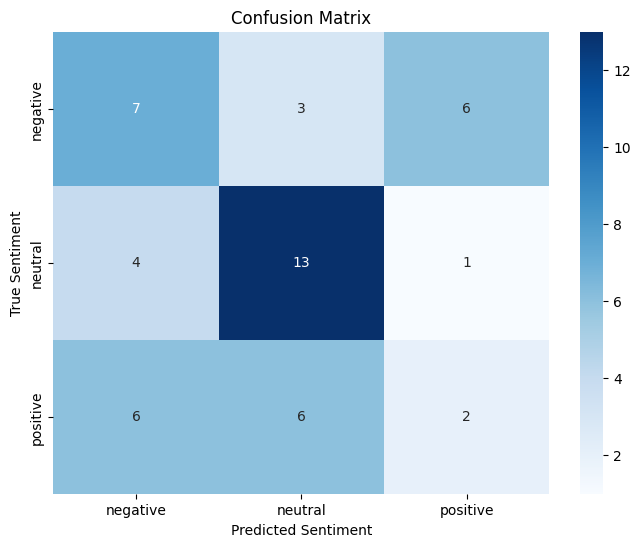

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix')
plt.show()

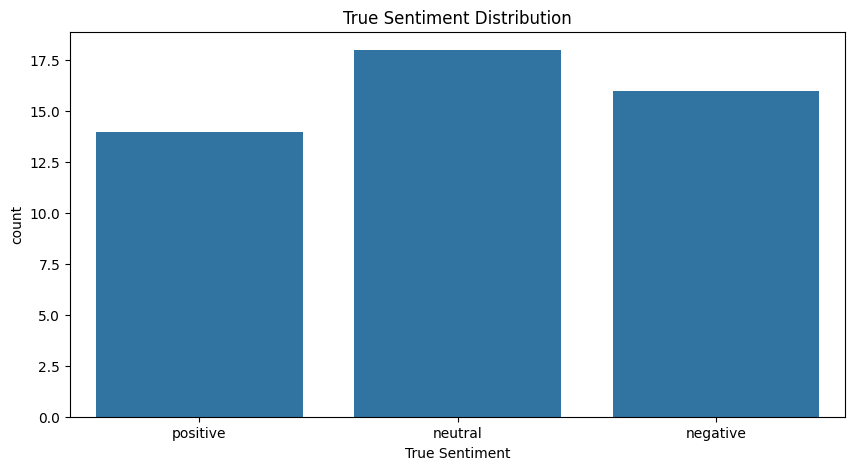

In [ ]:
# Create a DataFrame for true and predicted sentiments
results_df = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred})

# Distribution of true sentiments
plt.figure(figsize=(10, 5))
sns.countplot(data=results_df, x='True Sentiment')
plt.title('True Sentiment Distribution')
plt.show()

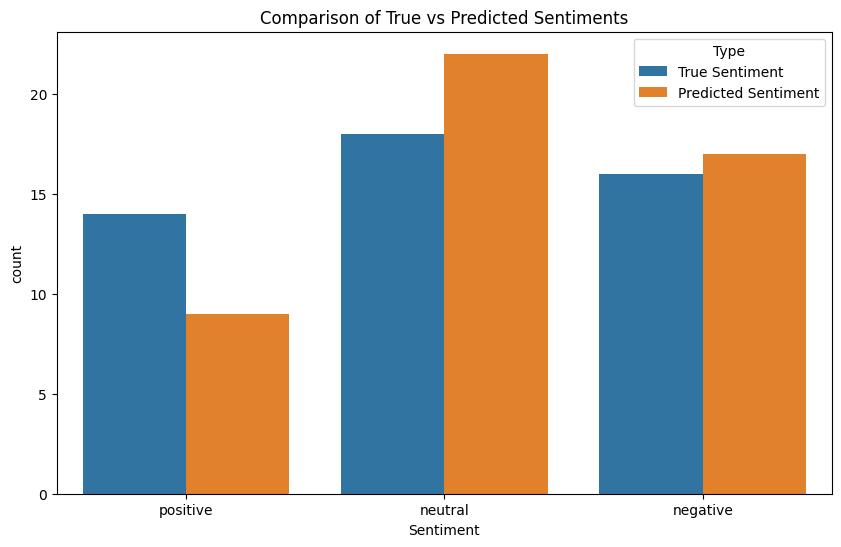

In [ ]:
# Comparison of true and predicted sentiments
comparison_df = results_df.melt(var_name='Type', value_name='Sentiment')

plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df, x='Sentiment', hue='Type')
plt.title('Comparison of True vs Predicted Sentiments')
plt.show()

# Saving the model

In [ ]:
from joblib import dump

dump(clf, 'model.joblib')

['model.joblib']